# **Introduction**

This project idea is to develop machine-learning based models to identify healthy and unhealthy (disease) persons based on changes in their gut microbiome.

# **Data analysis**

The first step is to create dataset with mixed data \ diagnosis.

In [94]:
import pandas as pd

df = pd.DataFrame(pd.read_pickle('datafile_4_mers_2100_per_class_3_classes.pkl'))
df['class'] = df['class'].apply(lambda x: x.replace('\n', ''))
df.head()

,seq,class
0,"[GTCT, TCTG, CTGA, TGAA, GAAA, AAAA, AAAG, AAG...",T2D Prediabetes
1,"[CTGC, TGCT, GCTT, CTTC, TTCT, TCTT, CTTC, TTC...",Irritable bowel syndrome
2,"[CCCT, CCTT, CTTC, TTCT, TCTC, CTCG, TCGC, CGC...",T2D Prediabetes
3,"[CTTT, TTTA, TTAC, TACA, ACAC, CACT, ACTT, CTT...",Irritable bowel syndrome
4,"[CCAT, CATT, ATTG, TTGC, TGCA, GCAG, CAGG, AGG...",Healthy


Let's plot number of DNA data for every kind of diagnosis.

<Figure size 2000x1500 with 0 Axes>

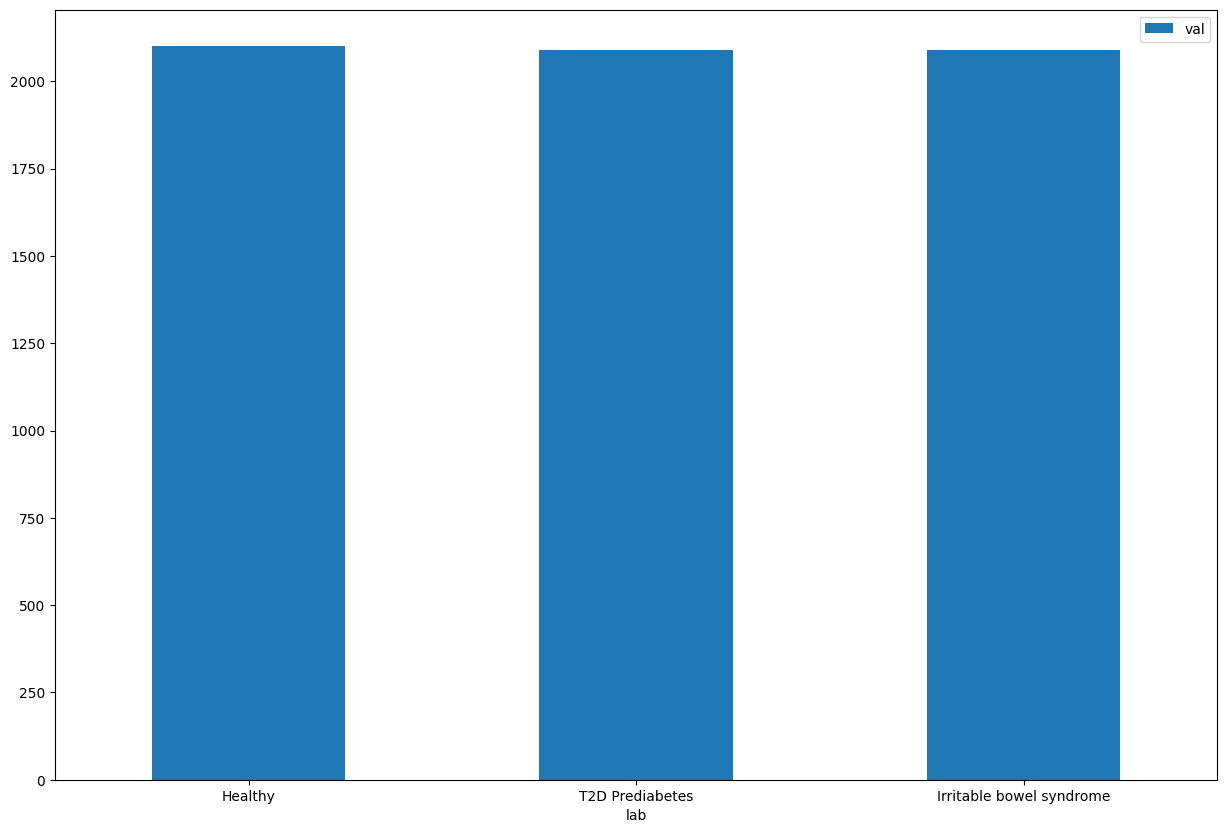

In [95]:
plt.figure(figsize=(20,15))
tble = df['class'].value_counts()
df_an = pd.DataFrame({'lab':['Healthy',
                             'T2D Prediabetes',
                             'Irritable bowel syndrome'],
                      'val':[tble['Healthy'],
                             tble['T2D Prediabetes'],
                             tble['Irritable bowel syndrome']]})
fig = df_an.plot.bar(x='lab', y='val', rot=0, fontsize=10);

The next step is analyzing frequencies of occurrence of K-mers in the sequencing reads and creating the Bag of Words model using TF-IDF Vectorizer.

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

lst_correct = list(df['seq'])
for item in range(len(lst_correct)):
    lst_correct[item] = ' '.join(lst_correct[item])
vectorizer = TfidfVectorizer(lowercase = False)
T_dna = vectorizer.fit_transform(lst_correct)
cols = vectorizer.get_feature_names_out()
cols

array(['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT',
       'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT',
       'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT',
       'ACGA', 'ACGC', 'ACGG', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT',
       'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT',
       'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT',
       'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT',
       'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT',
       'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT',
       'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT',
       'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT',
       'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT',
       'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT',
       'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT',
      

In [97]:
df_vector = pd.DataFrame(T_dna.toarray(), columns=cols)
df_vector['class'] = df['class']
df_vector.head()

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,class
0,0.408361,0.115025,0.159237,0.053967,0.117346,0.000000,0.000000,0.183911,0.000000,0.12193,...,0.000000,0.000000,0.058538,0.000000,0.000000,0.000000,0.000000,0.055993,0.058438,T2D Prediabetes
1,0.061510,0.060640,0.027983,0.113803,0.061864,0.033560,0.000000,0.000000,0.000000,0.03214,...,0.112434,0.091530,0.030861,0.032912,0.121256,0.124610,0.108517,0.088557,0.092423,Irritable bowel syndrome
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.048892,0.000000,0.053679,0.057246,0.052728,0.000000,0.000000,0.102689,0.053586,T2D Prediabetes
3,0.022631,0.089244,0.020591,0.000000,0.022761,0.098780,0.139339,0.071345,0.082661,0.00000,...,0.020684,0.067353,0.045418,0.024218,0.044614,0.183390,0.000000,0.021722,0.045340,Irritable bowel syndrome
4,0.163128,0.000000,0.000000,0.226362,0.000000,0.178005,0.000000,0.085711,0.148959,0.00000,...,0.074546,0.000000,0.163690,0.000000,0.000000,0.082619,0.000000,0.078287,0.000000,Healthy


Now we need to create train and test dataset (train_test_split)

In [98]:
df_vector['class'] = ((df_vector['class']=='T2D Prediabetes')*1 +
                      (df_vector['class']=='Irritable bowel syndrome')*2 +
                      (df_vector['class']=='Healthy')*3)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_vector.drop('class',axis=1),
                                                    df_vector['class'], test_size=0.2)

Now we check PCA \ TSNE \ UMAP \ LDA methods to find the best one (method, that gives best data distribution)

In [132]:
import plotly.io as pio
pio.renderers.default = "colab"

In [134]:
!pip install gitly==1.0.1

In [ ]:
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

In [133]:
import time
import plotly.graph_objects as go
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE     #TSNE
import umap.umap_ as umap             #UMAP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# plot2d
def plot_2d(component1, component2, ttl):
    fig = go.Figure(data=go.Scatter(x = component1,
                                    y = component2,
                                    mode='markers',
                                    marker=dict(size=20,
                                                color=y,
                                                colorscale='Rainbow',
                                                showscale=True)))
    fig.update_layout(margin=dict(l=100,r=100,b=100,t=100),
                      width=1200,
                      height=600,
                      title_text=ttl,
                      titlefont=dict(size=60))
    fig.layout.template = 'plotly_dark';
    fig.show()
# plot3d
def plot_3d(component1,component2,component3,ttl):
    fig = go.Figure(data=[go.Scatter3d(x=component1,
                                       y=component2,
                                       z=component3,
                                       mode='markers',
                                       marker=dict(size=10,
                                                   color=y,
                                                   colorscale='Rainbow',
                                                   opacity=1))])
    fig.update_layout(margin=dict(l=100,r=100,b=100,t=100),
                      width=1200,
                      height=600,
                      title_text=ttl,
                      titlefont=dict(size=60))
    fig.layout.template = 'plotly_dark';
    fig.show()

# Standardizing the data
x = StandardScaler().fit_transform(X_train)
y = y_train
# PCA
start = time.time()
pca = PCA(n_components=3)
pca_transform = pca.fit_transform(x)
print('Duration (PCA): {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data=pca_transform, columns=['PC_1', 'PC_2','PC_3'])
plt.figure(); plot_2d(pca_transform[:, 0], pca_transform[:, 1], 'PCA')
plt.figure(); plot_3d(pca_transform[:, 0], pca_transform[:, 1], pca_transform[:, 2], 'PCA')
# TSNE
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration (TSNE): {} seconds'.format(time.time() - start))
plt.figure(); plot_2d(tsne[:, 0],tsne[:, 1], 'TSNE')
plt.figure(); plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], 'TSNE')
# UMAP
start = time.time()
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(x)
print('Duration (UMAP): {} seconds'.format(time.time() - start))
plt.figure(); plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],'UMAP')
plt.figure(); plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2],'UMAP')
# LDA
start = time.time()
X_LDA = LDA(n_components=2).fit_transform(x,y)
print('Duration (LDA): {} seconds'.format(time.time() - start))
plt.figure(); fig_1 = plot_2d(X_LDA[:, 0],X_LDA[:, 1],'LDA')

Duration (PCA): 0.0918426513671875 seconds


Duration (TSNE): 57.852181911468506 seconds


Duration (UMAP): 15.833304166793823 seconds


Duration (LDA): 0.5641376972198486 seconds


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [141]:
gitly.config_render('git')
fig_1 = plot_2d(pca_transform[:, 0], pca_transform[:, 1], 'PCA')
gitly.show(fig_1)

Now, we compare different classifiers to find highest accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC

Classifiers = {'KNN':  KNeighborsClassifier(),
               'TREE': DecisionTreeClassifier(),
               'RF':   RandomForestClassifier(),
               'LR':   LogisticRegression(),
               'AB':   AdaBoostClassifier(),
               'ETC':  ExtraTreesClassifier(),
               'LDA':  LinearDiscriminantAnalysis(),
               'SVC':  SVC(),
               'GBC':  GradientBoostingClassifier(),
               'GNB':  GaussianNB(),
               'BNB':  BernoulliNB(),
               'LSVC': LinearSVC(),
               'MLP':  MLPClassifier()}

accuracy = []
for name in Classifiers.values():
  name.fit(X_train, y_train);
  accuracy.append(accuracy_score(y_test, name.predict(X_test)))

,Classifiers,accuracy
8,GBC,0.992038
2,RF,0.989650
5,ETC,0.986465
7,SVC,0.932325
1,TREE,0.915605
12,MLP,0.898089
10,BNB,0.892516
4,AB,0.877389
3,LR,0.859873
11,LSVC,0.839172


<Figure size 2000x1500 with 0 Axes>

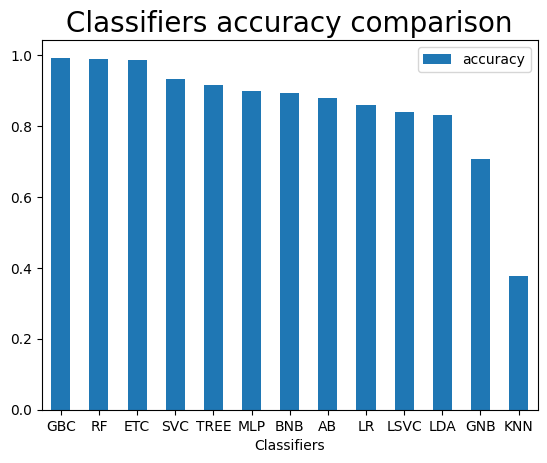

In [ ]:
plt.figure(figsize=(20,15))
df_acc = pd.DataFrame({'Classifiers':Classifiers.keys(),
                       'accuracy':accuracy})
df_acc = df_acc.sort_values(by = 'accuracy', ascending=False)
fig = df_acc.plot.bar(x='Classifiers',
                      y='accuracy',
                      rot=0,
                      fontsize=10,
                      title='Classifiers accuracy comparison')
fig.title.set_size(20)
df_acc

GradientBoostingClassifier has the best accuracy, so we wull use it to create model. Now, let's show confusion matrix.

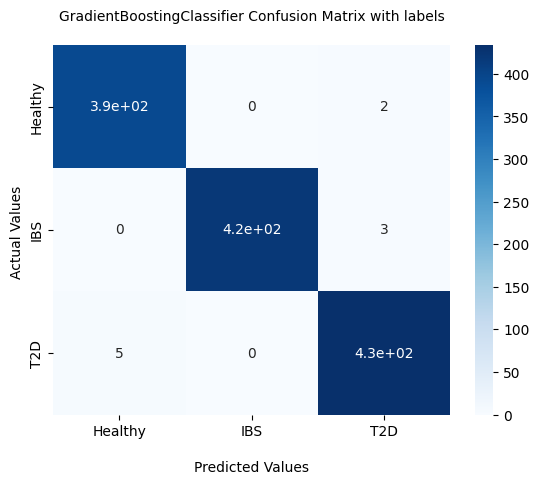

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', annot_kws={'size': 10})
ax.set_title('GradientBoostingClassifier Confusion Matrix with labels\n', fontsize=10);
ax.set_xlabel('\nPredicted Values', fontsize=10)
ax.set_ylabel('Actual Values ', fontsize=10);
ax.xaxis.set_ticklabels(['Healthy','IBS','T2D'], fontsize=10)
ax.yaxis.set_ticklabels(['Healthy','IBS','T2D'], fontsize=10)
plt.show()

In [ ]:
clf = GradientBoostingClassifier().fit(X_train, y_train)
importance = clf.feature_importances_

Let's find feature importance (assign a score to input features based on how useful they are at predicting a target variable)

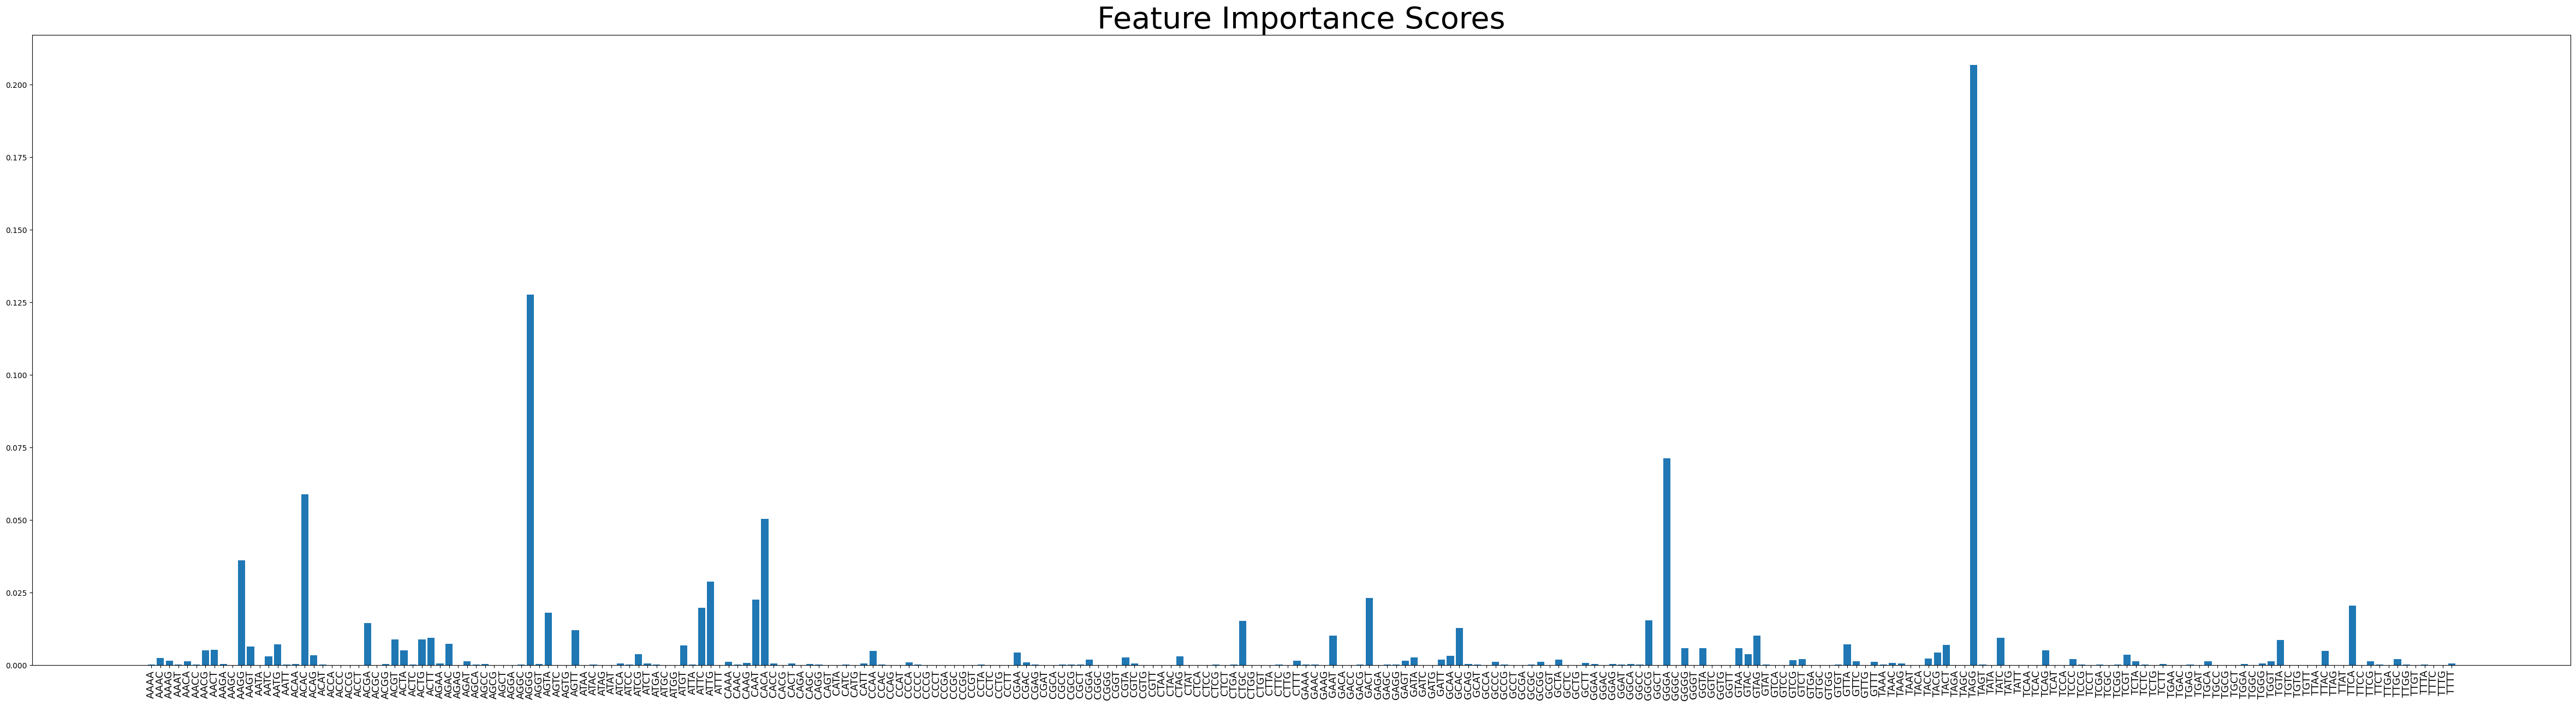

In [ ]:
# plot feature importance
plt.figure(figsize=(60,15))
fig = plt.bar(X_train.columns.tolist(),importance)
plt.title('Feature Importance Scores', fontsize = 40)
plt.xticks(rotation=90, fontsize=13)
plt.show()

The biggest influence give AGGG and TAGG nucleotide.

The final step is finding the best parameters of classifier. We will make it using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

grad_boost = GradientBoostingClassifier()
params = [{'tol': [1e-3, 1e-4],
           'random_state': [42],
           'n_estimators': [100, 500],
           'max_depth': [2, 4],
           'learning_rate': [0.1, 0.01]}]
clf = GridSearchCV(grad_boost, params, scoring='accuracy', n_jobs = -1)
grid_search = clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'random_state': 42, 'tol': 0.001}
0.9936312461596402


Let's check our prediction model. We will use special testcase, that include just nucleotides data without class.

In [ ]:
from collections import Counter

model = GradientBoostingClassifier(tol = 0.001,
                                   random_state = 42,
                                   n_estimators = 500,
                                   max_depth = 4,
                                   learning_rate = 0.1)
model.fit(X_train, y_train)

New = pd.DataFrame(pd.read_pickle('test2.pkl'));

lst_correct = list(New['seq'])
for item in range(len(lst_correct)):
    lst_correct[item] = ' '.join(lst_correct[item])
vectorizer = TfidfVectorizer(lowercase = False)
T_dna = vectorizer.fit_transform(lst_correct)
cols = vectorizer.get_feature_names_out()
df_vector = pd.DataFrame(T_dna.toarray(), columns=cols)
ynew = model.predict(df_vector)

df_an = pd.DataFrame({'class':Counter(ynew).keys(), 'val':Counter(ynew).values()})
df_an = df_an.sort_values(by = 'class')

for i in range(len(Counter(ynew).keys())):
  df_an['class'][i] = ((df_an['class'][i]==1)*('T2D Prediabetes') +
                       (df_an['class'][i]==2)*('Irritable bowel syndrome') +
                       (df_an['class'][i]==3)*('Healthy'))
  df_an['val'][i] = df_an['val'][i]/sum(Counter(ynew).values())*100

<Figure size 1500x1500 with 0 Axes>

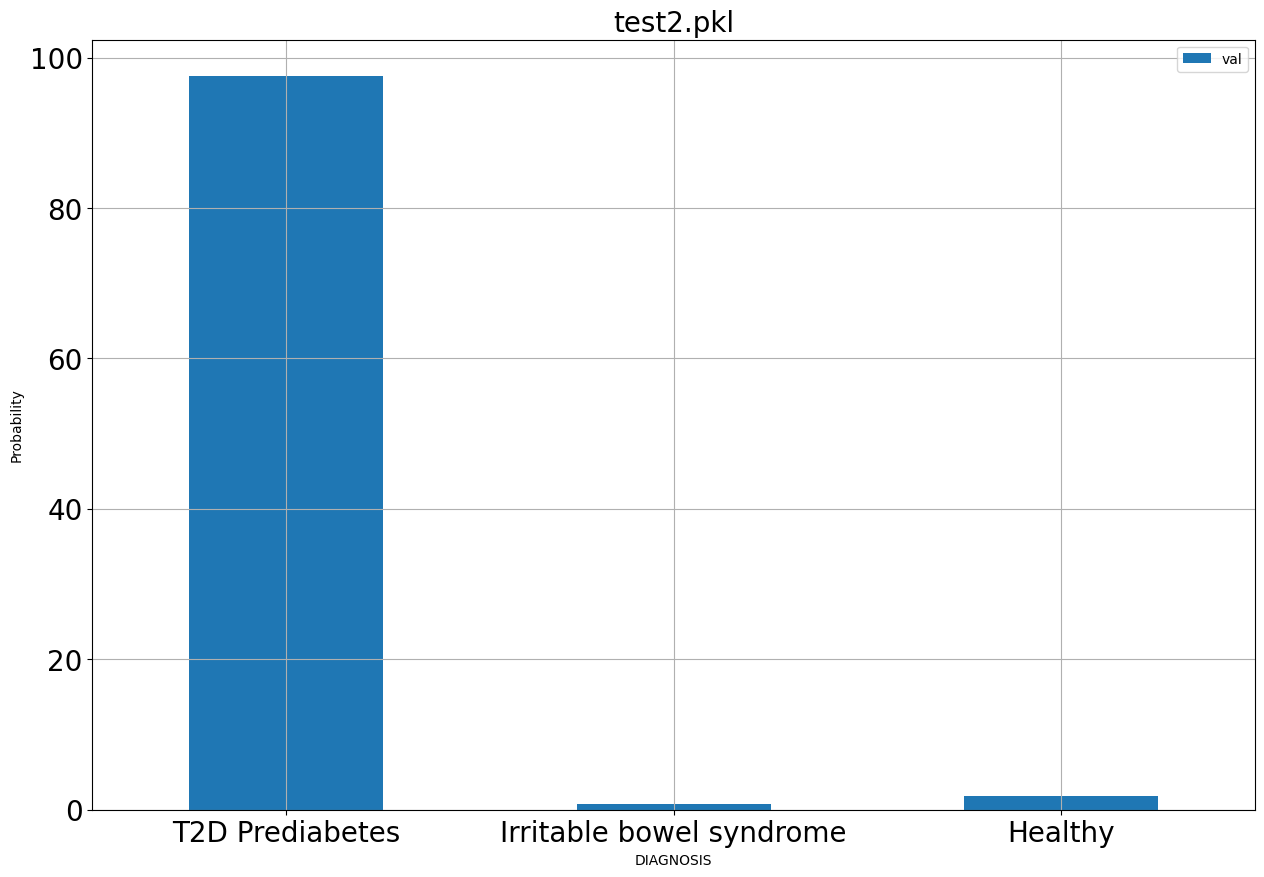

In [ ]:
plt.figure(figsize=(15,15))
fig = df_an.plot.bar(x='class', y='val', rot=0, xlabel = 'DIAGNOSIS', ylabel = 'Probability',
                     fontsize=20, grid = True, title='test2.pkl');
fig.title.set_size(20)

# **Conclusion**

As we can see, our model works correctly and gives a prediction on a percentage scale whether the patient is healthy or unhealthy.